`conda install tensorflow=1.12`

`conda install tensorboard=1.12`

In [1]:
import numpy as np
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

### Sample

In [2]:
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0) # also tf.float32 implicitly
total = a + b
print(a)
print(b)
print(total)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("add:0", shape=(), dtype=float32)


## TensorBoard

In [3]:
writer = tf.summary.FileWriter('log/')
writer.add_graph(tf.get_default_graph())

### run this command to see computational graph
`$ tensorboard --logdir log/`

and then visit `localhost:{port}`

You should see something like this

![title](img/graph.1.png)

## Session

In [4]:
with tf.Session(config=config) as sess:
    print(sess.run(total))
# here session is closed

7.0


In [5]:
sess = tf.Session(config=config)

In [6]:
# evaluate total
print(sess.run(total))

7.0


In [7]:
# You can pass multiple tensors to tf.Session.run
print(sess.run({'ab':(a, b), 'total':total}))

{'ab': (3.0, 4.0), 'total': 7.0}


the following code calls `tf.random_uniform` to produce a `tf.Tensor` that generates a random 3-element vector (with values in \[0,1))

The result shows a different random value on each call to `run`, but a consistent value during a single `run` (`out1` and `out2` receive the same random input

In [8]:
vec = tf.random_uniform(shape=(3,))
out1 = vec + 1
out2 = vec + 2
print(sess.run(vec))
print(sess.run(vec))
print(sess.run((out1, out2)))

[0.8829906  0.36817455 0.9367448 ]
[0.30404067 0.65845394 0.3476889 ]
(array([1.653235 , 1.790113 , 1.4024962], dtype=float32), array([2.653235 , 2.790113 , 2.4024963], dtype=float32))


In [9]:
# resetting graph
# see more in documentation
sess.close()
tf.reset_default_graph()
sess = tf.Session(config=config)

In [10]:
# reset tensorboard
!rm log/* -rf

In [11]:
writer = tf.summary.FileWriter('log/')

## Feeding

A graph can be parameterized to accept external inputs, known as **placeholders**. A **placeholder** is a like a function argument.

In [12]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
z = x + y

In [13]:
writer.add_graph(tf.get_default_graph())

In [14]:
print(sess.run(z, feed_dict={x: [3,3], y: [2, 3]}))
print(sess.run(z, feed_dict={x: [1, 3], y: [2, 4]}))

[5. 6.]
[3. 7.]


Note that the `feed_dict` argument can be used to overwrite any tensor in the graph. The only difference between placeholders and other `tf.Tensors` is that placeholders throw an error if no value is fed to them.

## Evaluating Tensors

Once the computation graph has been built, you can run the computation that produces a particular tf.Tensor and fetch the value assigned to it. This is often useful for debugging as well as being required for much of TensorFlow to work.

The simplest way to evaluate a Tensor is using the Tensor.eval method. For example:

In [15]:
p = tf.placeholder(tf.float32)
t = p + 1.0
print(t.eval(feed_dict={p:1},
             session=sess))

2.0


## Some tensor examples

#### Rank

In [16]:
# rank 0
mammal = tf.Variable("Elephant", tf.string)
ignition = tf.Variable(451, tf.int16)
floating = tf.Variable(3.14159265359, tf.float64)
its_complicated = tf.Variable(12.3 - 4.85j, tf.complex64)

In [17]:
# rank 1
mystr = tf.Variable(["Hello"], tf.string)
cool_numbers  = tf.Variable([3.14159, 2.71828], tf.float32)
first_primes = tf.Variable([2, 3, 5, 7, 11], tf.int32)
its_very_complicated = tf.Variable([12.3 - 4.85j, 7.5 - 6.23j], tf.complex64)

In [18]:
# higher ranks
mymat = tf.Variable([[7],[11]], tf.int16)
myxor = tf.Variable([[False, True],[True, False]], tf.bool)
linear_squares = tf.Variable([[4], [9], [16], [25]], tf.int32)
squarish_squares = tf.Variable([ [4, 9], [16, 25] ], tf.int32)

rank_of_squares = tf.rank(squarish_squares)

mymatC = tf.Variable([[7],[11]], tf.int32)

# pictures x height x width x color
my_image = tf.zeros([10, 299, 299, 3])  

In [19]:
r = tf.rank(my_image)
# After the graph runs, r will hold the value 4.
r.eval(session=sess)

4

#### slices

In [20]:
my_vector = tf.placeholder(tf.int32, shape=None, name="my_vector")

In [21]:
with sess.as_default():
    print(my_vector[2:4].eval(feed_dict={my_vector: np.arange(10)}))
    
    print(my_image[1, 3:10, 2, 1:].eval().shape)

[2 3]
(7, 2)


#### shape

In [22]:
my_image

<tf.Tensor 'zeros:0' shape=(10, 299, 299, 3) dtype=float32>

In [23]:
my_image[:,3:10, ...].shape[1]

Dimension(7)

In [24]:
zeros = tf.zeros(my_image[:,3:10, ...].shape[1])
print(zeros.eval(session=sess).shape)
print(zeros.eval(session=sess))

(7,)
[0. 0. 0. 0. 0. 0. 0.]


#### reshape

In [25]:
rank_three_tensor = tf.ones([3, 4, 5])

# Reshape existing content into a 6x10 matrix
matrix = tf.reshape(rank_three_tensor, [6, 10])  

# Reshape existing content into a 3x20 matrix.
#  -1 tells reshape to calculate the size of this dimension.
matrixB = tf.reshape(matrix, [3, -1])  

# Reshape existing content into a 4x3x5 tensor
matrixAlt = tf.reshape(matrixB, [4, 3, -1])  

In [26]:
matrixB.shape

TensorShape([Dimension(3), Dimension(20)])

#### reduce ...

In [27]:
np.random.seed(1)
a = tf.constant(
    np.random.randint(0, 10, (3, 4))
)

In [28]:
sess.run(a)

array([[5, 8, 9, 5],
       [0, 0, 1, 7],
       [6, 9, 2, 4]])

In [29]:
sess.run(tf.reduce_sum(a))

56

In [30]:
sess.run(tf.reduce_sum(a, axis=1))

array([27,  8, 21])

In [31]:
sess.run(tf.reduce_mean(a, axis=0, keepdims=True))

array([[3, 5, 4, 5]])

In [32]:
sess.run(tf.reduce_prod(a, keepdims=True))

array([[0]])

### Variables

In [33]:
a = tf.Variable(initial_value=1)

In [34]:
sess.run(tf.global_variables_initializer())
# sess.run(a.initializer)
a.initializer

<tf.Operation 'Variable_13/Assign' type=Assign>

In [35]:
sess.run(a)

1

In [36]:
op_assign = a.assign(3)
op_assign_add = a.assign_add(2) # same as a.assign(a + 2)
op_assign_sub = a.assign_sub(-2)

In [37]:
op_assign, op_assign.op

(<tf.Tensor 'Assign:0' shape=() dtype=int32_ref>,
 <tf.Operation 'Assign' type=Assign>)

In [38]:
sess.run([a, op_assign.op, op_assign, a])

[3, None, 3, 3]

In [39]:
sess.close()

In [40]:
sess = tf.Session(config=config)

In [ ]:
sess.run(a)
# Oops!

## Some cool stuff: Gradients

`tf.gradients(ys, xs)` Constructs symbolic partial derivatives of sum of ys w.r.t. x in xs.

In [41]:
# for tensorborad
sess.close()
tf.reset_default_graph()
sess = tf.Session(config=config)
!rm log/* -rf
writer = tf.summary.FileWriter('log/')

### Simplest example
## $ y = x^3 $

In [42]:
x = tf.placeholder(dtype=tf.float64, shape=(), name='x')
y = x**3

In [43]:
y.eval({x: 2}, session=sess)

8.0

In [49]:
grad_y = tf.gradients(y, x, name="grad_y")
grad_y

[<tf.Tensor 'grad_y_1/pow_grad/Reshape:0' shape=() dtype=float64>]

## $ \frac{dy}{dx} = 3\, x^2 $

In [50]:
grad_y[0].eval({x: 2}, session=sess)

12.0

In [51]:
writer.add_graph(tf.get_default_graph())

Look at tensorboard (refresh the tensorboard tab)

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline

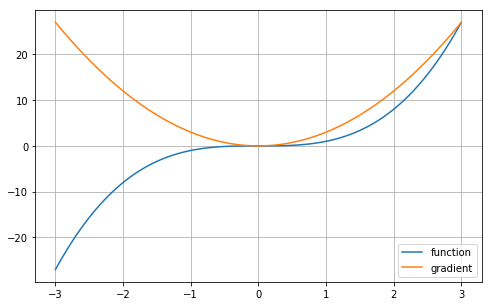

In [48]:
X = np.linspace(-3, 3, 100)
with sess.as_default():
    Y = np.array([y.eval({x: _x}) for _x in X])
    grad_Y = np.array([grad_y[0].eval({x: _x}) for _x in X])
plt.figure(figsize=(8, 5))
plt.plot(X, Y, label="function")
plt.plot(X, grad_Y, label="gradient")
plt.grid()
plt.legend()

### More complicated example

In [53]:
my_scalar = tf.placeholder(dtype=tf.float64)
my_vector = tf.placeholder(tf.float64)

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = tf.reduce_mean(
    (my_vector+my_scalar)**(1. + tf.nn.moments(my_vector, axes=[0])[1]) + \
    1. / tf.log(my_scalar + tf.sqrt(my_scalar**2 + 1.))) / (my_scalar**2 + 1.) + \
    0.01 * tf.sin(2 * my_scalar**1.5) * (tf.reduce_sum(my_vector) * my_scalar**2) * \
    tf.exp((my_scalar - 4.)**2) / (1. + tf.exp((my_scalar - 4)**2)) * \
    (1. - (tf.exp( - (my_scalar - 4.)**2)) / (1. + tf.exp( - (my_scalar - 4.)**2)))**2

In [54]:
der_by_scalar, der_by_vector = (None, None) #<student.compute_grad_over_scalar_and_vector()>
der_by_scalar, der_by_vector = tf.gradients(weird_psychotic_function, [my_scalar, my_vector])

compute_weird_function = lambda x, y: sess.run(weird_psychotic_function, {my_scalar : x, my_vector : y })
compute_der_by_scalar = lambda x, y: sess.run(der_by_scalar, {my_scalar : x, my_vector : y })

In [55]:
compute_der_by_scalar_numerically = lambda x, y, dx: (
    (sess.run(weird_psychotic_function, {my_scalar : x + dx, my_vector : y }) - 
     sess.run(weird_psychotic_function, {my_scalar : x, my_vector : y })) /dx)

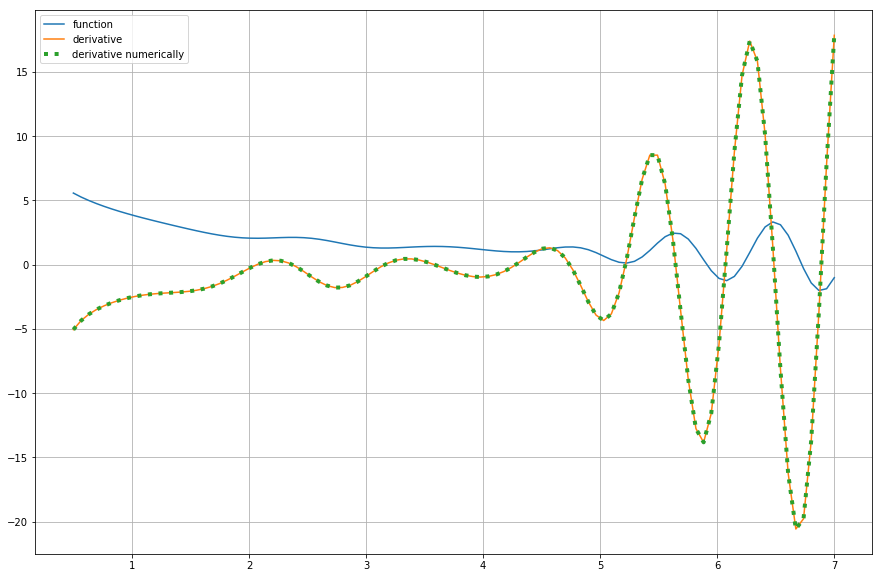

In [56]:
#Plotting your derivative
vector_0 = [1, 2, 3]

scalar_space = np.linspace(0.5, 7, 100)

y = [compute_weird_function(x, vector_0) for x in scalar_space]
y_der_by_scalar = [compute_der_by_scalar(x, vector_0) for x in scalar_space]
y_der_by_scalar_numerically = [compute_der_by_scalar_numerically(x, vector_0, 0.0005) for x in scalar_space]

plt.figure(figsize=(15, 10))

plt.plot(scalar_space, y, label='function')
plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.plot(scalar_space, y_der_by_scalar_numerically, ":", lw=4, label='derivative numerically')
plt.grid()
plt.legend()